In [1]:
# Import basic numerical and plotting libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numba
from numba import jit, vectorize, float64

# Import machine learning libraries
import tensorflow as tf
sess = tf.Session(config = tf.ConfigProto(log_device_placement = True))

import keras
keras.backend.set_session(sess)

Using TensorFlow backend.


In [2]:
## Import the dataset file ##
filepath = 'C:\\Users\\user\\OneDrive - SNU\\Jhe Lab\\Projects\\Current\\1. AFM Contact Point Detection\\DohyunBest_best_deriv.npz'
dataset = np.load(filepath)
print(dataset.files)

['filename', 'raw', 'mech', 'imin', 'Q', 'w0', 'w', 'I0', 'C0C', 'E', 'kint', 'bint', 'Fk', 'Fb']


**0. Plot the amplitude and phase**

In [3]:
mech_dataset = dataset['mech']
Q_dataset = dataset['Q']

amp = 
for i in range(Q_dataset.size):
    

310


In [ ]:
# Import trained model
savepath = 'C:\\Users\\user\\OneDrive - SNU\\Jhe Lab\\Projects\\Current\\1. AFM Contact Point Detection\\Approach_VAE\\Source Codes\\'
name = '20190510_encoder'
modelpath = savepath + name + '.json'
weightpath = savepath + name + '.h5'

from keras.models import model_from_json

# Model reconstruction from JSON file
with open(modelpath, 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights(weightpath)

In [3]:
'''
CreateDataframe(dataset, N_trial)
- Inputs: 
1) dataset: the imported npz file of the original approach curve dataset
2) N_trial: number of the trial number

- Outputs:
1) df_trial: dataframe containing the approach curve physical observables - z, mech_amp, mech_phas, k_int, b_int, E_dis, F_b, F_k
2) param_trial: list containing the relevant parameters of the approach curve - filename, Q, w0, w
'''
def CreateDataframe(dataset, N_trial):
    imin = dataset['imin'][N_trial] + 1
    
    mech = dataset['mech'][N_trial][0:imin, :]
    kint = dataset['kint'][N_trial][0:imin]
    bint = dataset['bint'][N_trial][0:imin]
    Edis = dataset['E'][N_trial][0:imin]
    Fk = dataset['Fk'][N_trial][0:imin]
    Fb = dataset['Fb'][N_trial][0:imin]
    
    filename = dataset['filename'][N_trial]
    Q = dataset['Q'][N_trial]
    w0 = dataset['w0'][N_trial]
    w = dataset['w'][N_trial]
    
    df_trial = np.c_[mech, kint, bint, Edis, Fk, Fb]
    df_trial = pd.DataFrame(df_trial, columns = ['z', 'amp', 'phas', 'd_amp', 'd_phas', 'kint', 'bint', 'Edis', 'Fk', 'Fb'])
    param_trial = [filename, Q, w0, w]
    
    return df_trial, param_trial

**1. Investigate the statistical characteristics of the AFM dataset**

In [4]:
## Select particular approach curve ##

N_data = dataset['filename'].size
print('Total number of approach curves: %d' %(N_data))

N_trial = input('Input desired trial number: ')
N_trial = int(N_trial)

## Create dataframe for a given approach curve ##
df_trial, param_trial = CreateDataframe(dataset, N_trial)
df_trial.head()

Total number of approach curves: 310
Input desired trial number: 100


,z,amp,phas,d_amp,d_phas,kint,bint,Edis,Fk,Fb
0,9.882628,1.000000,0.087919,0.000152,-0.000065,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,9.836856,1.000746,0.087575,0.000221,-0.000058,-7.728283e-08,-4.123212e-12,-4.282736e-07,-7.734047e-08,-1.351338e-07
2,9.792897,0.999634,0.087855,0.000289,-0.000051,-6.113179e-09,2.144494e-12,2.221545e-07,-6.110941e-09,7.020541e-08
3,9.743953,1.001867,0.087862,0.000358,-0.000044,-4.186453e-08,-1.071641e-11,-1.115254e-06,-4.194268e-08,-3.516122e-07
4,9.700900,1.000768,0.087437,0.000427,-0.000037,-1.037557e-07,-4.181252e-12,-4.343753e-07,-1.038354e-07,-1.370391e-07


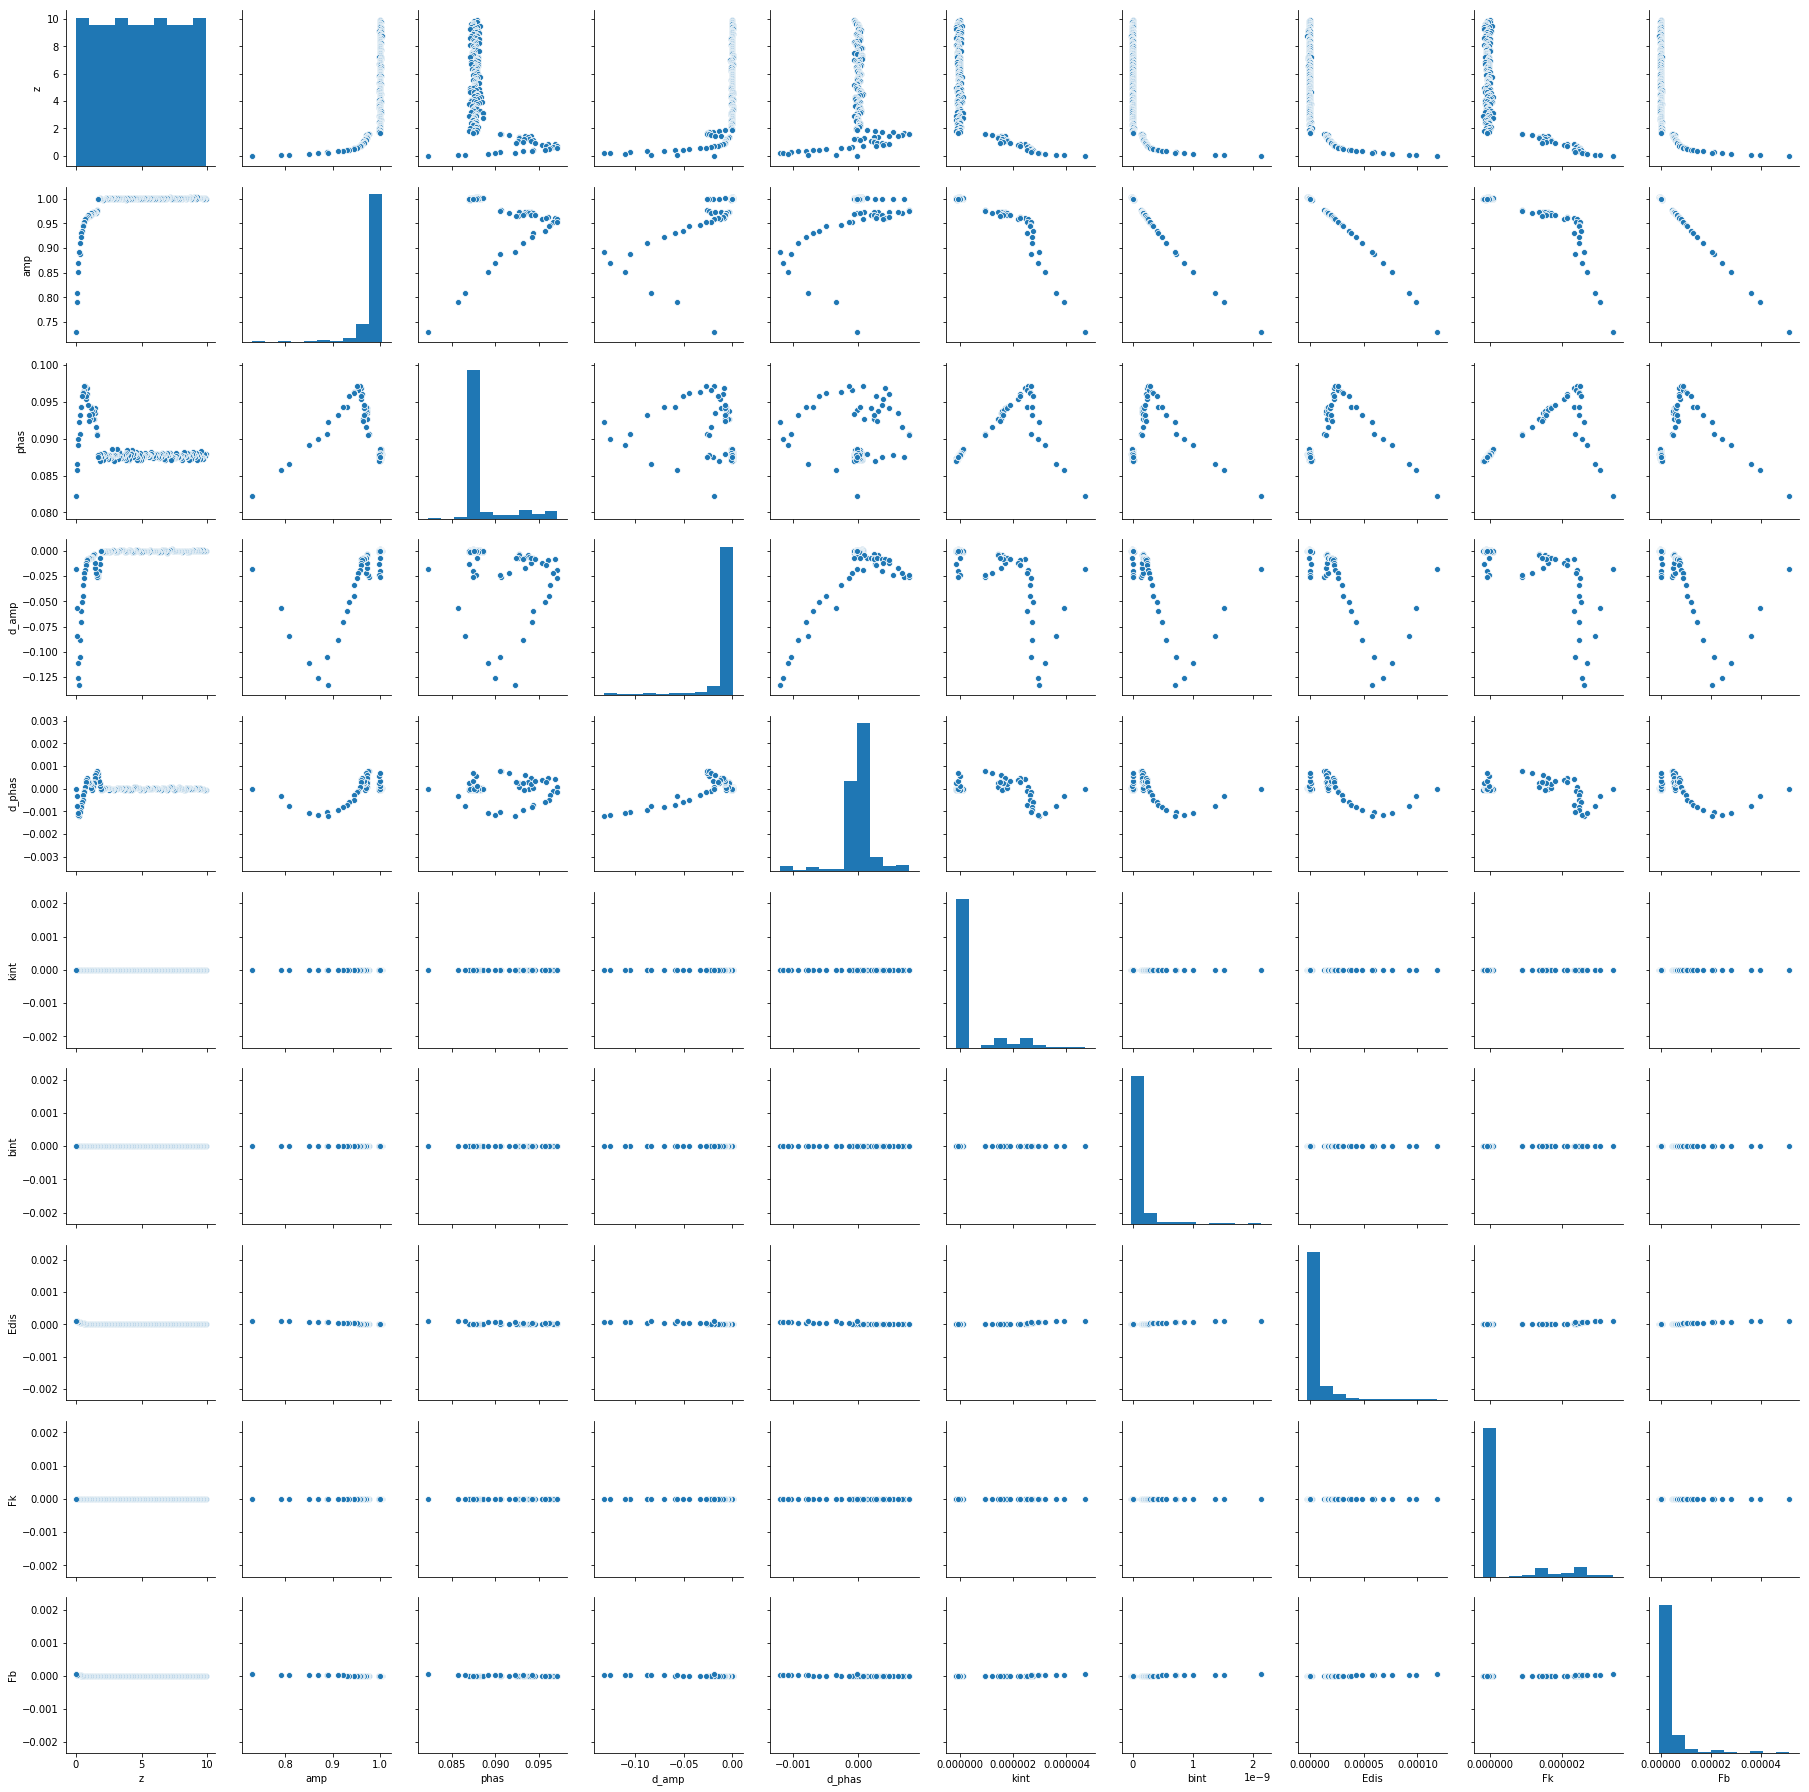

In [5]:
fig = sns.pairplot(df_trial)

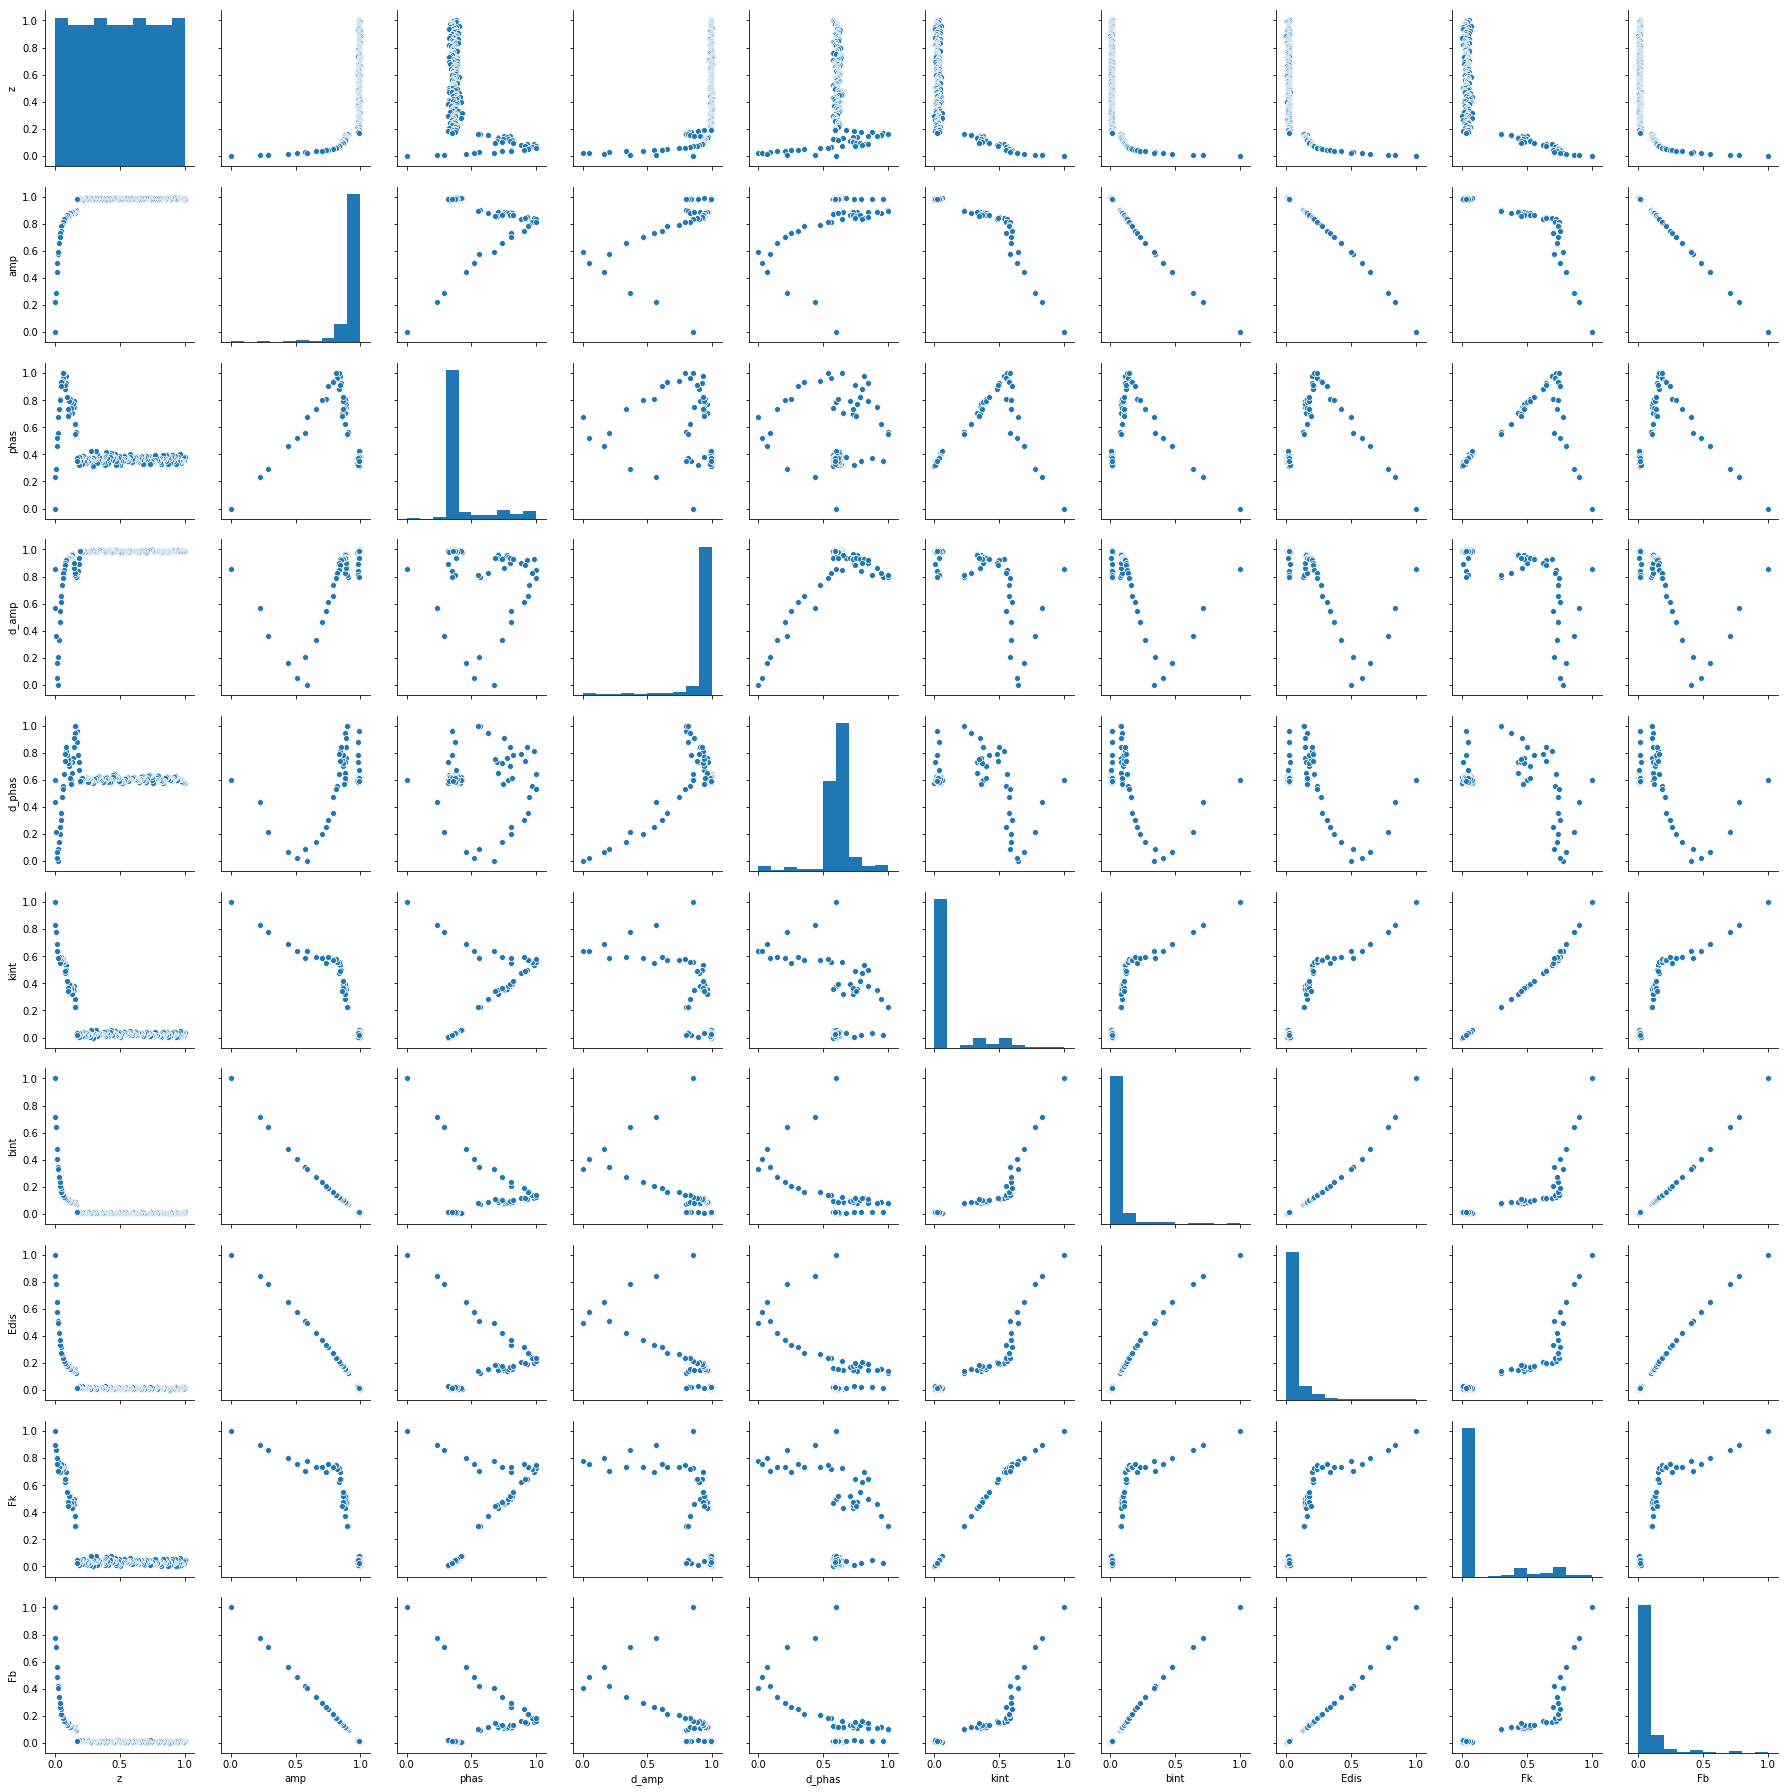

In [6]:
# Rescale all physical quantities for better visualization

def rescale(array):
    array_min = np.amin(array)
    array_max = np.amax(array)
    return (array-array_min)/(array_max-array_min)

df_trial_rescaled = df_trial.apply(rescale)

fig = sns.pairplot(df_trial_rescaled)

In [4]:
# Select particular approach curve
print(Q_dataset.size)
trial_index = 60
trial = raw_dataset[trial_index]
imin = imin_dataset[trial_index]

# Calculate normalized k_int and b_int
k_i = kint_dataset[trial_index][0:imin]
b_i = bint_dataset[trial_index][0:imin]
E_i = E_dataset[trial_index][0:imin]
Fk_i = Fk_dataset[trial_index][0:imin]
Fb_i = Fb_dataset[trial_index][0:imin]

# Lock-in variables
z_i = trial[0:imin ,0]
Ae_i = trial[0:imin ,1]
Pe_i = trial[0:imin ,2]
Ae_i = Ae_i/Ae_i[0]

# Calculate latent variables
batch_size = 128
latent = model.predict(trial[0:imin, 1:], batch_size = batch_size)

310


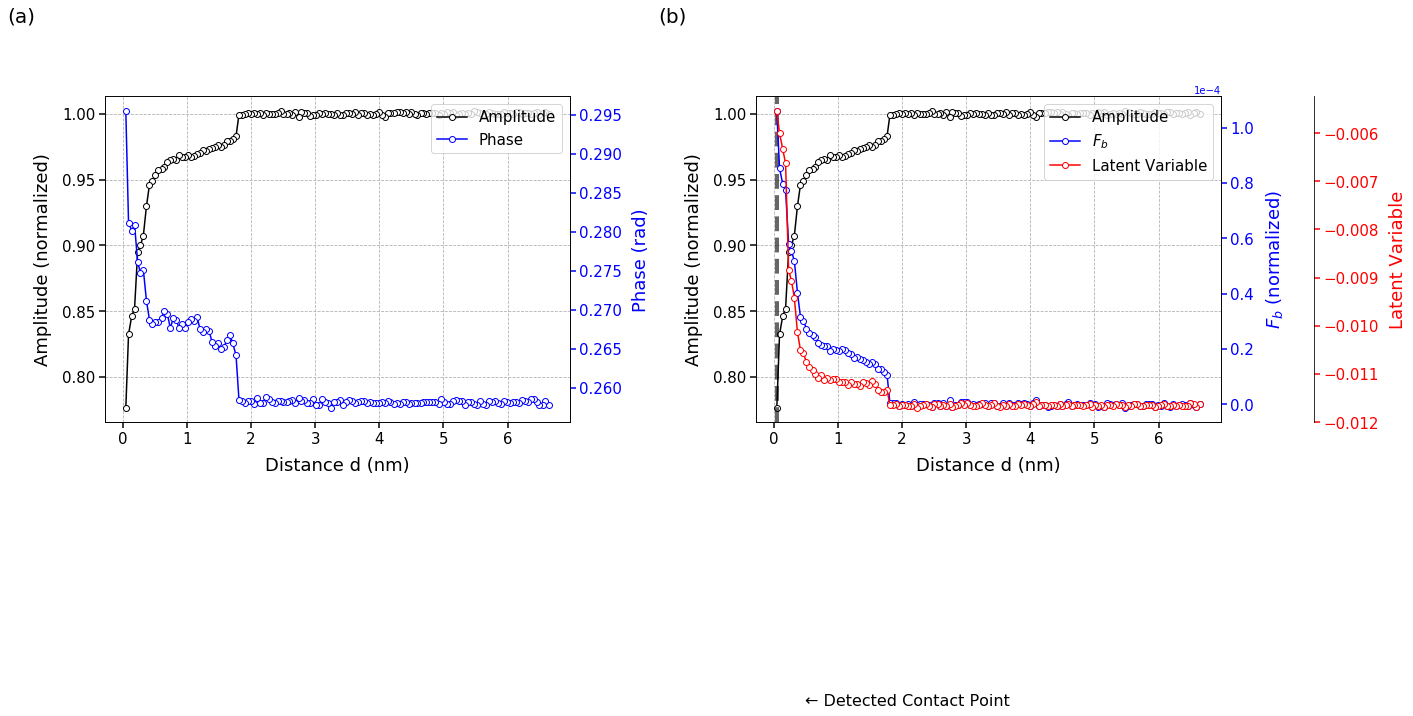

In [5]:
fontsize = 18
labelpad = 10
tkw = dict(size = 6, width = 1.5, labelsize = 15)

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

## Create a figure with two subplots ##
fig = plt.figure(figsize = (20, 6))
ax_left = fig.add_subplot(121)
ax_right = fig.add_subplot(122)
fig.subplots_adjust(wspace = 0.4)
## Plot the left figure ##
ax_left2 = ax_left.twinx()

l_left = ax_left.plot(z_i, Ae_i, 'ko-', mfc = 'white', label = 'Amplitude')
l_left2 = ax_left2.plot(z_i, Pe_i, 'bo-', mfc = 'white', label = 'Phase')

h_left, l_left = ax_left.get_legend_handles_labels()
h_left2, l_left2 = ax_left2.get_legend_handles_labels()

ax_left.legend(h_left+h_left2, l_left+l_left2, loc = 'upper right', fontsize = fontsize - 3)

ax_left.set_xlabel('Distance d (nm)', fontsize = fontsize, labelpad = labelpad)
ax_left.set_ylabel('Amplitude (normalized)', fontsize = fontsize, labelpad = labelpad)
ax_left2.set_ylabel('Phase (rad)', fontsize = fontsize, labelpad = labelpad)

ax_left.yaxis.label.set_color('black')
ax_left2.yaxis.label.set_color('blue')

ax_left.tick_params(axis='x', **tkw)
ax_left.tick_params(axis='y', **tkw)
ax_left2.tick_params(axis='y', colors='blue', **tkw)

ax_left.grid(ls = '--')

## Plot the right figure ##
ax_right2 = ax_right.twinx()
ax_right3 = ax_right.twinx()

# Offset the right spine of ax_right3.  The ticks and label have already been placed on the right by twinx above.
ax_right3.spines["right"].set_position(("axes", 1.2))

# Having been created by twinx, ax_right3 has its frame off, so the line of its detached spine is invisible.  
# First, activate the frame but make the patch and spines invisible.
make_patch_spines_invisible(ax_right3)
# Second, show the right spine.
ax_right3.spines["right"].set_visible(True)

# Plot the data
ax_right.plot(z_i, Ae_i, 'ko-', mfc = 'white', label = 'Amplitude')
ax_right2.plot(z_i, E_i, 'bo-', mfc = 'white', label = '$F_b$')
ax_right3.plot(z_i, latent, 'ro-', mfc = 'white', label = 'Latent Variable')

h_right, l_right = ax_right.get_legend_handles_labels()
h_right2, l_right2 = ax_right2.get_legend_handles_labels()
h_right3, l_right3 = ax_right3.get_legend_handles_labels()

# Set axis labels
ax_right.set_xlabel('Distance d (nm)', fontsize = fontsize, labelpad = labelpad)
ax_right.set_ylabel('Amplitude (normalized)', fontsize = fontsize, labelpad = labelpad)
ax_right2.set_ylabel('$F_b$ (normalized)', color = 'blue', fontsize = fontsize, labelpad = labelpad)
ax_right3.set_ylabel('Latent Variable', color = 'red', fontsize = fontsize, labelpad = labelpad)

# Set axis color and size
ax_right2.yaxis.label.set_color('blue')
ax_right3.yaxis.label.set_color('red')

ax_right.tick_params(axis='x', **tkw)
ax_right.tick_params(axis='y', **tkw)
ax_right2.tick_params(axis='y', colors='blue', **tkw)
ax_right3.tick_params(axis='y', colors='red', **tkw)

ax_right2.ticklabel_format(style = 'sci', scilimits = (0,0))

# Create unified legend for all the plots
ax_right.legend(h_right+h_right2+h_right3, l_right+l_right2+l_right3, loc = 'upper right', fontsize = fontsize - 3)

ax_right.axvline(trial[np.argmax(latent),0], color = 'black', linewidth = 4, linestyle = '--', alpha = 0.6)
ax_right.text(0.49, 0.55, '\u2190 Detected Contact Point', fontsize = 16)
ax_right.grid(ls = '--')

ax_left.text(-1.8, 1.07, '(a)', fontsize = 20)
ax_right.text(-1.8, 1.07, '(b)', fontsize = 20)
fig.savefig('Figure2.png', bbox_inches='tight')

In [ ]:
# Calculate mechanical amplitude and phase for approach curve data
N = Q_dataset.size
appm_dataset = []
E_dataset = []
k_dataset = []
b_dataset = []
Fk_dataset = []
Fb_dataset = []

for i in range(N):
    data_i = app_dataset[i]
   
    z_i = data_i[:,0]
    Ae_i = data_i[:,1]
    Pe_i = data_i[:,2]

    C0C_i = C0C_dataset[i]
    I0_i = I0_dataset[i]
    Q_i = Q_dataset[i]
    w0_i = w0_dataset[i]

    Am_i = np.sqrt(Ae_i**2-2*C0C_i*(I0_i/Q_i)*Ae_i*np.sin(Pe_i)+(C0C_i*I0_i/Q_i)**2)
    Pm_i = np.arctan2(Ae_i*np.sin(Pe_i)-C0C_i*(I0_i/Q_i), Ae_i*np.cos(Pe_i))
    Am_i = Am_i/Am_i[0]
    Pm_i = Pm_i-Pm_i[0]
    
    appm_i = np.c_[z_i, Pm_i, Am_i]
    
    Edis_i = (np.pi/Q_i)*(Am_i*np.cos(Pm_i)-Am_i**2)
    bint_i = (np.cos(Pm_i)/Am_i - 1)/(Q_i*w0_i)
    kint_i = np.sin(Pm_i)/(Am_i*w0_i)
    
    Fk_i = kint_i*Am_i
    Fb_i = bint_i*w0_i*Am_i
    
    appm_dataset.append(appm_i)
    E_dataset.append(Edis_i)
    k_dataset.append(kint_i)
    b_dataset.append(bint_i)
    Fk_dataset.append(Fk_i)
    Fb_dataset.append(Fb_i)

E_dataset = np.array(E_dataset)
k_dataset = np.array(k_dataset)
b_dataset = np.array(b_dataset)
Fk_dataset = np.array(Fk_dataset)
Fb_dataset = np.array(Fb_dataset)

# Combine all approach data into a single dataset
lock_in = appm_dataset[0]

for i in range(1,len(appm_dataset)):
    lock_in = np.r_[lock_in, appm_dataset[i]]

In [5]:
### Compare traditional Jhe Lab Soft Contact Point with VAE-based Contact Point ###
batch_size = 128
N = Q_dataset.size

cp_jhe = np.empty(N)
cp_vae = np.empty(N)

for i in range(N):
    z_i = app_dataset[i][: ,0]
    appm_i = appm_dataset[i]
    Fk_i = Fk_dataset[i]
    
    # Use VAE to predict the contact point
    latent_i = model.predict(appm_i[:, 1:], batch_size = batch_size)
    cp_vae[i] = z_i[np.argmax(latent_i)]
    
    # Detect the local minima in the z - Fk curve to find the traditional contact point
    n = Fk_i.size
    m = 8
    
    for j in np.arange(n-1,m,-1):
        [a, b, c] = np.polyfit(z_i[j-m:j], Fk_i[j-m:j], 2)
        flag = -b/(2*a)
    
        if (a>0) and (flag <= z_i[j-m]) and (flag >= z_i[j]):
            cp_jhe[i] = flag
            break



In [ ]:
plt.plot(cp_jhe, cp_vae, '.')
plt.plot(cp_jhe, cp_jhe, '--')

In [ ]:
print(cp_vae)

Draw <Figure 2> for the Shear Mode Data and Training Results
- Left: Typical Shear Mode Approach Curve Data
- Right: Comparison Between Machine Learning Prediction and Conventional Approach

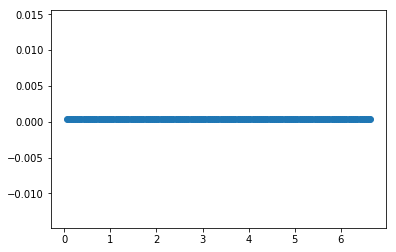

In [7]:
plt.scatter(z_i, latent)

(12263,)
(12263,)
(12263,)


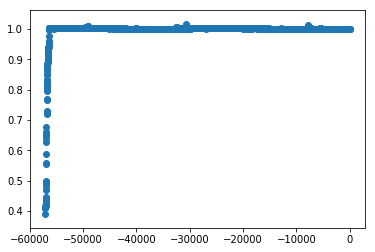

In [8]:
# Import approach curve
filepath = 'C:\\Users\\user\\OneDrive - SNU\\Jhe Lab\\Projects\Current\\1. AFM Contact Point Detection\\Raw Data_Me\\'
dataname = '0904ApproachCurve1.txt'
datapath = filepath + dataname

# Preallocate lists for z, amp, phas
z = []
amp = []
phas = []
 
# fast file import using "with"
# unlike np.loadtxt, which loads the entire file into memory before importing, this reads data line by line into memory
with open(datapath) as file:
    for index, line in enumerate(file):
        if index == 0:
            header = line
                
        else:
            word_list = line.split('\t')
                
            z.append(float(word_list[0]))
            amp.append(float(word_list[1]))
            phas.append(float(word_list[2]))
                
# Convert numpy arrays    
z = np.array(z)
amp = np.array(amp)
phas = np.array(phas)
        
# Preprocess data
z = z - z[0]
amp = amp/amp[0]
phas = (phas - phas[0])*np.pi/10
  
print(z.shape)
print(amp.shape)
print(phas.shape)

# Discard NaN
nan_index = np.logical_or(np.isnan(amp), np.isnan(phas))
z = z[~nan_index]
amp = amp[~nan_index]
phas = phas[~nan_index]

# Discard retraction part
z_min_index = np.argmin(z)
z = z[:z_min_index+1]
amp = amp[:z_min_index+1]
phas = phas[:z_min_index+1]

# Check results
plt.scatter(z, amp)
plt.show()

In [9]:
# Extract latent variables
lock_in = np.c_[z, amp, phas]
batch_size = 256
print(lock_in.shape)
latent = model.predict(lock_in[:, 1:], batch_size = batch_size)

(5709, 3)


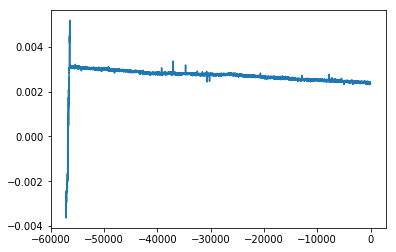

In [17]:
plt.plot(z, latent)